<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/Heart_parameters_class_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import imblearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [4]:
df= pd.read_csv("/gdrive/My Drive/df1_heart.csv")

In [5]:
df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Age,SepsisLabel
0,0,99.0,100.0,37.0,120.0,71.0,60.0,69.66,0
1,1,97.5,100.0,37.0,120.0,78.0,60.0,69.66,0
2,2,96.0,100.0,37.0,120.0,70.0,60.0,69.66,0
3,3,100.0,99.0,37.0,120.0,75.0,60.0,69.66,0
4,4,102.0,100.0,36.0,120.0,74.0,60.0,69.66,0


In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
pd.crosstab(df.SepsisLabel, columns='count')

col_0,count
SepsisLabel,
0,973683
1,20124


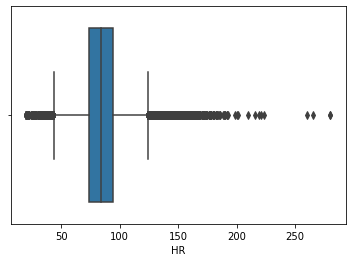

In [8]:
sns.boxplot(df['HR'])

In [9]:
print(df['HR'].quantile(0.10))
print(df['HR'].quantile(0.90))

64.0
106.0


In [10]:
df["HR"] = np.where(df["HR"] <64.0, 64.0,df['HR'])
df["HR"] = np.where(df["HR"] >106.0, 106.0,df['HR'])
print(df['HR'].skew())

0.11335757383538864


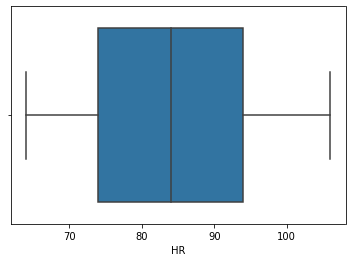

In [11]:
sns.boxplot(df['HR'])

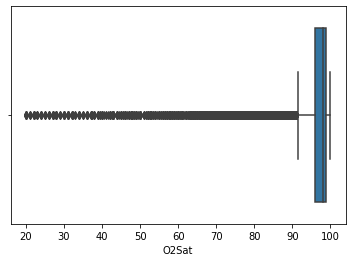

In [12]:
sns.boxplot(df['O2Sat'])

In [13]:
print(df['O2Sat'].quantile(0.10))
print(df['O2Sat'].quantile(0.90))

94.0
100.0


In [14]:
df["O2Sat"] = np.where(df["O2Sat"] <94.0, 94.0,df['O2Sat'])
df["O2Sat"] = np.where(df["O2Sat"] >100.0, 100.0,df['O2Sat'])
print(df['O2Sat'].skew())

-0.4277130710644394


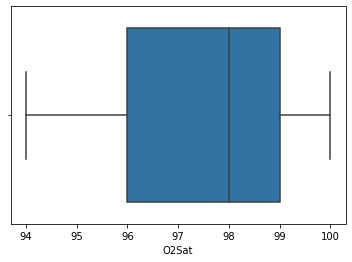

In [15]:
sns.boxplot(df['O2Sat'])

In [16]:
print(df['SBP'].quantile(0.10))
print(df['SBP'].quantile(0.90))

97.0
150.0


In [17]:
df["SBP"] = np.where(df["SBP"] <97.0, 97.0,df['SBP'])
df["SBP"] = np.where(df["SBP"] >150.0, 150.0,df['SBP'])
print(df['SBP'].skew())

0.2804638587639356


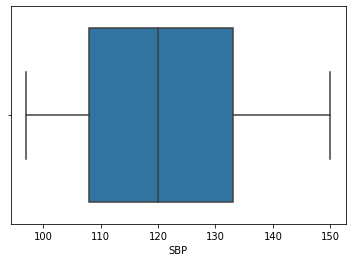

In [18]:
sns.boxplot(df['SBP'])

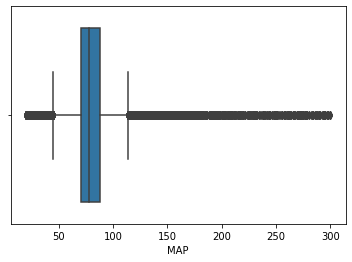

In [19]:
sns.boxplot(df['MAP'])

In [20]:
print(df['MAP'].quantile(0.10))
print(df['MAP'].quantile(0.90))

63.0
99.0


In [21]:
df["MAP"] = np.where(df["MAP"] <63.0, 63.0,df['MAP'])
df["MAP"] = np.where(df["MAP"] >99.0, 99.0,df['MAP'])
print(df['MAP'].skew())

0.2901440610172552


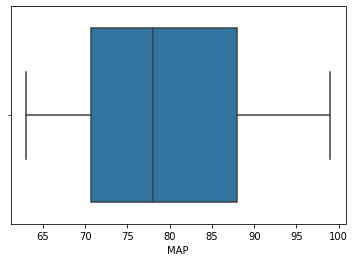

In [22]:
sns.boxplot(df['MAP'])

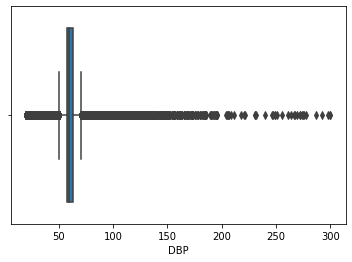

In [23]:
sns.boxplot(df['DBP'])

In [24]:
print(df['DBP'].quantile(0.10))
print(df['DBP'].quantile(0.90))

50.0
74.0


In [25]:
df["DBP"] = np.where(df["DBP"] <50.0, 50.0,df['DBP'])
df["DBP"] = np.where(df["DBP"] >74.0, 74.0,df['DBP'])
print(df['DBP'].skew())

0.44949881448858164


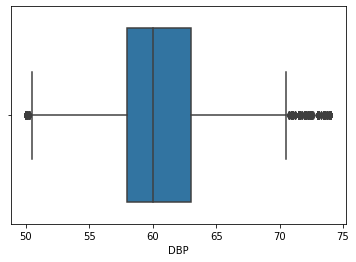

In [26]:
sns.boxplot(df['DBP'])

In [27]:
from pandas import read_csv, DataFrame, crosstab, pivot_table, set_option

In [28]:
# Descriptives
df = df.sample(n=20000, replace=False,random_state=1)
df = DataFrame(df)
print("Descriptive distributions:")
print("")
print(df.describe())
print("")

Descriptive distributions:

                 HR         O2Sat  ...           Age   SepsisLabel
count  20000.000000  20000.000000  ...  20000.000000  20000.000000
mean      84.308575     97.527575  ...     62.462932      0.021100
std       13.193566      1.959284  ...     16.392707      0.143721
min       64.000000     94.000000  ...     14.000000      0.000000
25%       74.000000     96.000000  ...     52.000000      0.000000
50%       84.000000     98.000000  ...     64.450000      0.000000
75%       94.000000     99.000000  ...     75.250000      0.000000
max      106.000000    100.000000  ...    100.000000      1.000000

[8 rows x 8 columns]



In [29]:
X = df.drop('SepsisLabel', axis=1)
y = df.SepsisLabel

In [30]:
#Train-Test split using stratified random sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=4)

In [31]:
#Checking the class (percentage) distribution of the target in the training set
pd.crosstab(y_train, columns='count')/len(y_train)*100

col_0,count
SepsisLabel,
0,97.892857
1,2.107143


In [32]:
#Checking the class (percentage) distribution of the target in the training set
pd.crosstab(y_test, columns='count')/len(y_test)*100

col_0,count
SepsisLabel,
0,97.883333
1,2.116667


Random undersampling

In [33]:
from imblearn import under_sampling, over_sampling

In [34]:
#Performing random undersampling on the training dataset
rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=1.0)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
#Checking the class distribution of the target
pd.crosstab(y_rus, columns='count')/len(y_rus)*100

col_0,count
row_0,
0,50.0
1,50.0


In [36]:
#Performing random undersampling on the training dataset
rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=1.0)
X_rus_test, y_rus_test = rus.fit_resample(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
#Checking the class distribution of the target
pd.crosstab(y_rus_test, columns='count')/len(y_rus_test)*100

col_0,count
row_0,
0,50.0
1,50.0


In [38]:
from sklearn.naive_bayes import GaussianNB # I am using Gaussian algorithm from Naive Bayes

# Lets creat the model
sepsis_model = GaussianNB()

sepsis_model.fit(X_rus, y_rus.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
sepsis_train_predict = sepsis_model.predict(X_rus)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_rus, sepsis_train_predict)))
print()

Model Accuracy: 0.6627



In [40]:
sepsis_test_predict = sepsis_model.predict(X_rus_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_rus_test, sepsis_test_predict)))
print()

Model Accuracy: 0.6024



In [41]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_rus_test, sepsis_test_predict, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_rus_test, sepsis_test_predict, labels=[1, 0]))

Confusion Matrix
[[ 51  76]
 [ 25 102]]

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.40      0.50       127
           0       0.57      0.80      0.67       127

    accuracy                           0.60       254
   macro avg       0.62      0.60      0.59       254
weighted avg       0.62      0.60      0.59       254



In [42]:
from sklearn.ensemble import RandomForestClassifier
sepsis_rf_model = RandomForestClassifier(random_state=52)
sepsis_rf_model.fit(X_rus, y_rus.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=52, verbose=0,
                       warm_start=False)

In [43]:
rf_train_predict = sepsis_rf_model.predict(X_rus)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_rus, rf_train_predict)))

Model Accuracy: 1.00


In [44]:
rf_test_predict = sepsis_rf_model.predict(X_rus_test)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_rus_test, rf_test_predict)))

Model Accuracy: 0.91


In [45]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_rus_test, rf_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_rus_test, rf_test_predict, labels=[1, 0]))

Confusion Matrix
[[117  10]
 [ 14 113]]

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.92      0.91       127
           0       0.92      0.89      0.90       127

    accuracy                           0.91       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.91      0.91      0.91       254



In [46]:
from sklearn.linear_model import LogisticRegression

sepsis_lr_model = LogisticRegression(C=0.7, random_state=52)
sepsis_lr_model.fit(X_rus, y_rus.ravel())
lr_test_predict = sepsis_lr_model.predict(X_rus_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_rus_test, lr_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_rus_test, lr_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_rus_test, lr_test_predict, labels=[1, 0]))

Model Accuracy: 0.61

Confusion Matrix
[[71 56]
 [42 85]]

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.56      0.59       127
           0       0.60      0.67      0.63       127

    accuracy                           0.61       254
   macro avg       0.62      0.61      0.61       254
weighted avg       0.62      0.61      0.61       254



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
from sklearn.linear_model import LogisticRegressionCV
sepsis_lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=52, Cs=3, cv=10, refit=True, class_weight="balanced")
# As this algorithm uses k-fold cross validation so I am using 10 folds. Also I am using class_weight as balanced so it will use balanced data for Outcome
sepsis_lr_cv_model.fit(X_rus, y_rus.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=52, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [48]:
lr_cv_test_predict = sepsis_lr_cv_model.predict(X_rus_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_rus_test, lr_cv_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_rus_test, lr_cv_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_rus_test, lr_cv_test_predict, labels=[1, 0]))

Model Accuracy: 0.70

Confusion Matrix
[[85 42]
 [33 94]]

Classification Report
              precision    recall  f1-score   support

           1       0.72      0.67      0.69       127
           0       0.69      0.74      0.71       127

    accuracy                           0.70       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.71      0.70      0.70       254

